<a href="https://colab.research.google.com/github/dolmani38/drift/blob/main/Concept%20drift%EC%97%90%20%EC%9D%98%ED%95%9C%20%EB%AA%A8%EB%8D%B8%EC%9D%98%20%EC%84%B1%EB%8A%A5%20%EC%B6%94%EC%A0%95%20%EB%B0%A9%EB%B2%95_0601.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

*   기계학습은 학습에 의해 모델을 구축한 후, Test dataset을 사용하여 N-fold class-validation으로 precision, recall, f1 및 MAPE, RMSE 등 성능을 측정한다.
*   통상, 측정된 성능값은 해당 모델을 대변하는 성능 지표가 된다.
*   이렇게 구축된 모델은 live data를 입력해서 실 활용하게 되는데, 이때 초기에 측정한 성능을 지속하여 확보하고 있는지 실측하여 알 수 없다.
*   Time-series data에 의한 Regression의 경우, 예측 기간의 도래 이후, 실측 Y값을 알 수 있으나 역시 업무에 따라 그 시간 간격이 크게 발생 할 수 있으며, classification의 경우, 예측 class가 정확한지 실측하기 위해서는 별도의 labeling 작업을 해야 한다.
*   즉, 한번 구축한 모델은 활용 단계에서 성능을 실측하는 것이 매우 어려우며, 비즈니스상에서 IT운영팀에서 이를 관리하는 것은 현실적으로 불가능 하다.
*   하지만, 비즈니스 상에서 모델의 활용 중에 성능이 저하된다면 의사결정 및 경영상의 문제를 초래 할 수 있다.
*   하여, concept drift의 통계량을 측정하여 모델의 성능 상태를 유추하는 연구들이 이루어져 왔다.
*   하지만, concept drift의 측정값 (통계량)을 통해 precision, recall, accuracy 등 직접적으로 성능을 예측하는 연구는 많지 않다.
*   이번 연구에서는 concept drift의 측정값 (통계량)을 통해 직접적으로 precision, recall, accuracy 등 성능을 예측하는 성능 예측 모델(PPM, Performance prediction model)을 제안한다.












# Proposed Method

1.   Feature의 importanc를 측정하는 Lime 알고리즘은 reference data를 기반으로 가상의 dataset을 임의 생성(permutation)하여 model.predict에 의한 결과 (Y)를 대조 분석하여 importance를 추정(실험의 시행에 따른 statistics에 해당) 한다.
2.   즉, dataset의 feature중 x1의 값이 변하여도 Y의 변동이 없다면 x1의 importance는 낮은 것이다. 
3.   실험 dataset에서 X1의 변동량 대비 Y의 변동량을 통계적으로 측정하여 importance를 추정하는 것이다.
4.  유사한 원리로 data drift  model performance (accuracy) 모델을 생성할 수 있을 것이다.
5.   즉, 전체 Trainset에서 N-fold class-validation의 개념으로 reference dataset과 inference dataset을 임의로 나누고, 
6.   reference 의 feature x1 대비 inference의 feature x1의 drift statistics 을 측정하고 (이때, x2,x3… 모든 feature의 drift statistics 이 측정될 것임) 이때의 inference dataset의 accuracy를 측정하여 y값으로 설정하고
7.   각 feature의 drift statistics 를 x로 설정하여 regressio에 의해 modeling (학습) 한다.
8.   물론, trainset 내의 분포, 범위라는 한계성을 갖지만,  직접적인 model 성능 추정이 가능할 것이다.









## PPM1 : feature의 drift statistics 로부터 직접 model의 성능을 추정한다.

In [ ]:
trainset : y=f(x)
base_score = Score of base model
scores = []
feature_drift = []
split_ratio = 0.1
for n fold:
    y_ref, y_inf, x_ref, x_inf = split(y, x, split_ratio)
    inf_score = score(y_inf, predict(x_inf))
    x_drift = drift(x, x_inf)
    scores.add(inf_score)
    feature_drift.add(x_drift)
        
perfomance_predict_model_1 = train(scores, feature_drift)

x_live = Inference data from time1 to time2
x_live_drift = drift(x, x_live)
predict_score = perfomance_predict_model_1(x_live_drift)

## PPM2 : feature의 drift statistics 로부터 base성능 대비 추정 성능의 차이를 추정한다.

In [ ]:
trainset : y=f(x)
base_score = Score of the model
base_feature_drift = The drift statistics of the feature that measured the base score 
scores = []
feature_drift = []
split_ratio = 0.1
for n fold:
    y_ref, y_inf, x_ref, x_inf = split(y, x, split_ratio)
    inf_score = score(y_inf, predict(x_inf))
    x_drift = drift(x, x_inf)
    scores.add(base_score - inf_score)
    feature_drift.add(base_feature_drift - x_drift)
        
perfomance_predict_model_2 = train(scores, feature_drift)

x_live = Inference data from time1 to time2
x_live_drift = drift(x, x_live)
predict_score = base_score - socre_predict_model_from_drift(base_feature_drift - x_live_drift)



# 실험 계획

*   Data
> 미국의 개인 대출 기업 ‘Lending Club’의 공개 데이터 사용<BR>
> 2007~2017년까지 총 2,260,701건의 데이터, 대출 건당 실제 ‘default’ 여부 포함
151개 Column<BR>
> 데이터 정제 후, 81개 Features, 120만건 사용<BR>

* 예측 알고리즘
> Random-forest 알고리즘<BR>
> Deep-learning 알고리즘

* 실험
> 2010년 data를 기준으로 모델 학습<BR>
>2011년~2017년의 데이터를 2010년 학습데이터의 건수 (8000건) 단위로 drift 측정
모델의 예측 성능과 실 성능을 비교<BR>

* 실험의 변수
> PPM1, PPM2<BR>
> Split_ratio = 0.1, 0.3, 0.5<BR>
> 예측 알고리즘 : random_forest, deep_learning<BR>

* 측정 지표
> 예측 알고리즘의 성능 지표 : precision<BR>
> PPM의 성능 지표<BR>
    >>Mean Absolute Error (MAE)<BR>
    >>Mean Squared Error (MSE)<BR>
    >>Root Mean Squared Error (RMSE)<BR>
    >>R-Squared<BR>
    >>Adjusted R-squared<BR>


# 데이터 준비

In [1]:
if True:
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [3]:
df_accepted = pd.read_csv("/content/drive/MyDrive/Drift/accepted_2007_to_2018Q4.csv")

print(df_accepted.shape)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(2260701, 151)


### 데이터 정제

In [4]:
# for the sake of simplicity, let's consider only Fully Paid and Charged Off values:

df_accepted = df_accepted[df_accepted.loan_status.isin(['Fully Paid', 'Charged Off'])]

print(df_accepted.shape)

(1345310, 151)


In [5]:
cols_to_drop = df_accepted.isnull().sum().sort_values(ascending=False).head(50).index
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

(1345310, 101)

In [6]:
# maybe we can go further, and eliminate columns up to title:

cols_to_drop = df_accepted.isnull().sum().sort_values(ascending=False).head(45).index
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

(1345310, 56)

In [7]:
# Remaining columns have missing data points, but they account for less than 0.2% of the total data. Let's remove the rows that are missing those values in those columns with dropna():

df_accepted = df_accepted.dropna()
df_accepted.shape

(1341026, 56)

In [8]:
# These are constant columns. We can drop it either.

cols_to_drop = ['out_prncp', 'out_prncp_inv', 'policy_code']
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

(1341026, 53)

In [9]:
# It seems we have many "duplicated" information. Let's drop some columns, based on visual inspection at corr_pairs dataframe:

cols_to_drop = ['fico_range_low', 'funded_amnt_inv', 'funded_amnt', 'total_pymnt_inv', 'total_pymnt', 'installment', 'collection_recovery_fee', 'total_rec_prncp', 'last_fico_range_low']
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

(1341026, 44)

In [10]:
values = df_accepted.loan_status.unique()
encode = [1,0]
d = dict(zip(values, encode))

df_accepted['loan_paid'] = df_accepted['loan_status'].map(d)

df_accepted = df_accepted.drop(columns=['loan_status'])


In [11]:
df_accepted

,id,loan_amnt,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,loan_paid
0,68407277,3600.0,36 months,13.99,C,C4,MORTGAGE,55000.0,Not Verified,Dec-2015,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
1,68355089,24700.0,36 months,11.99,C,C1,MORTGAGE,65000.0,Not Verified,Dec-2015,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
2,68341763,20000.0,60 months,10.78,B,B4,MORTGAGE,63000.0,Not Verified,Dec-2015,...,Joint App,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
4,68476807,10400.0,60 months,22.45,F,F1,MORTGAGE,104433.0,Source Verified,Dec-2015,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
5,68426831,11950.0,36 months,13.44,C,C3,RENT,34000.0,Source Verified,Dec-2015,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,89905081,18000.0,60 months,9.49,B,B2,OWN,130000.0,Not Verified,Oct-2016,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
2260690,88948836,29400.0,60 months,13.99,C,C3,MORTGAGE,180792.0,Not Verified,Oct-2016,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
2260691,89996426,32000.0,60 months,14.49,C,C4,MORTGAGE,157000.0,Source Verified,Oct-2016,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,0
2260692,90006534,16000.0,60 months,12.79,C,C1,RENT,150000.0,Not Verified,Oct-2016,...,Individual,0.0,0.0,0.0,3.0,0.0,N,Cash,N,1


In [12]:
# droping constant columns

print(df_accepted.pymnt_plan.value_counts())
print(df_accepted.hardship_flag.value_counts())

cols_to_drop = ['id', 'pymnt_plan', 'hardship_flag']
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

n    1341026
Name: pymnt_plan, dtype: int64
N    1341026
Name: hardship_flag, dtype: int64


(1341026, 41)

In [13]:
cat_cols = df_accepted.select_dtypes(include=['object']).columns
print(cat_cols)

print(df_accepted.term.value_counts())

# convert term into either a 36 or 60 integer numeric data type

l1 = df_accepted.term.unique()
l2 = [36, 60]
d = dict(zip(l1, l2))

df_accepted['term'] = df_accepted['term'].map(d)

# as grade is part of sub_grade, so let's just drop the grade feature.

df_accepted = df_accepted.drop(columns='grade')

df_accepted = pd.get_dummies(df_accepted, columns = ['sub_grade'], prefix='', prefix_sep='', drop_first=True)

cat_cols = df_accepted.select_dtypes(include=['object']).columns
print(cat_cols)

# for these columns, let's just create dummy variables, concatenate them with the original dataframe and drop original columns.

df_accepted = pd.get_dummies(df_accepted, columns = ['verification_status'], prefix='', prefix_sep='', drop_first=True)
df_accepted = pd.get_dummies(df_accepted, columns = ['application_type'], prefix='', prefix_sep='', drop_first=True)
df_accepted = pd.get_dummies(df_accepted, columns = ['initial_list_status'], prefix='', prefix_sep='', drop_first=True)
df_accepted = pd.get_dummies(df_accepted, columns = ['purpose'], prefix='', prefix_sep='', drop_first=True)

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'url', 'purpose', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type', 'disbursement_method',
       'debt_settlement_flag'],
      dtype='object')
 36 months    1017398
 60 months     323628
Name: term, dtype: int64
Index(['home_ownership', 'verification_status', 'issue_d', 'url', 'purpose',
       'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status',
       'last_pymnt_d', 'last_credit_pull_d', 'application_type',
       'disbursement_method', 'debt_settlement_flag'],
      dtype='object')


In [14]:
df_accepted.shape

(1341026, 86)

In [15]:
df_accepted['home_ownership'] = df_accepted.home_ownership.replace('NONE', 'ANY')
df_accepted = pd.get_dummies(df_accepted, columns = ['home_ownership'], prefix='', prefix_sep='', drop_first=True)
df_accepted = df_accepted.drop(columns=[ 'url', 'last_pymnt_d', 'last_credit_pull_d'])
df_accepted = df_accepted.drop(columns=['zip_code', 'addr_state'])
df_accepted = pd.get_dummies(df_accepted, columns = ['disbursement_method'], prefix='', prefix_sep='', drop_first=True)
df_accepted = pd.get_dummies(df_accepted, columns = ['debt_settlement_flag'], prefix='', prefix_sep='', drop_first=True)
df_accepted = df_accepted.drop(columns=['earliest_cr_line'])
df_accepted.shape

(1341026, 83)

In [16]:
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Jan','01')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Feb','02')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Mar','03')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Apr','04')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('May','05')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Jun','06')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Jul','07')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Aug','08')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Sep','09')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Oct','10')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Dec','11')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Nov','12')

In [17]:
def reorder_issue_d(dt):
    a = dt.split('-')
    return a[1]+a[0]

reorder_issue_d('01-2009')

'200901'

In [ ]:
 df_accepted['issue_d'] = df_accepted['issue_d'].apply(reorder_issue_d)
 df_accepted = df_accepted.sort_values(by='issue_d')
 df_accepted.reset_index(drop=True, inplace=True)

### dataset 만들기

In [20]:
X = {}
Y = {}

In [21]:
# sampling data

# df = df_accepted.sample(frac=0.8,random_state=42)
# print(len(df))

df = df_accepted[df_accepted['issue_d'].str.startswith('2007') + df_accepted['issue_d'].str.startswith('2008') + df_accepted['issue_d'].str.startswith('2009')].copy()
df = df.drop(columns=['issue_d'])


/usr/local/lib/python3.7/dist-packages/pandas/core/computation/expressions.py:215: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


In [22]:
X[2009] = df.loc[:, df.columns != 'loan_paid'].values
Y[2009] = df.loan_paid.values

In [23]:
for year in range(2010,2019):
    print(year)
    df = df_accepted[df_accepted['issue_d'].str.startswith(str(year))].copy()
    df = df.drop(columns=['issue_d'])
    X[year] = df.loc[:, df.columns != 'loan_paid'].values
    Y[year] = df.loan_paid.values

2010
2011
2012
2013
2014
2015
2016
2017
2018


In [24]:
X[2010].shape

(11497, 81)

# 예측 모델 준비

## deep learning 모델

In [ ]:
import os.path 

def build_model_dl(year,x,y,epochs=5):
    #X_train, X_test, y_train, y_test = train_test_split(X[year], Y[year], test_size=0.2, random_state=42)
    X_train= scaler.fit_transform(x)
    #X_test = scaler.transform(X_test)
    y_train = get_one_hot(y,2)

    # building the model
    model = Sequential()
    model.add(Dense(units=78,activation='relu'))
    model.add(Dense(units=39,activation='relu'))
    model.add(Dense(units=19,activation='relu'))
    model.add(Dense(units=8,activation='relu'))
    model.add(Dense(units=4,activation='relu'))
    model.add(Dense(units=2,activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    weight_path = '/content/drive/MyDrive/Drift/model/ml_'+str(year)
    if os.path.exists(weight_path+'.index'):
        model.load_weights(weight_path)
        print('load weights from ',weight_path)
    else:
        model.fit(x=X_train, 
                y=y_train, 
                epochs=epochs,
                batch_size=512,
                verbose=1)
            #validation_data=(X_test, y_test), verbose=1)
        if year > 2000:
            model.save_weights(weight_path) 
            print('save weights to ',weight_path)
    return model

## random forest 모델

In [25]:
ML = {}
scaler = MinMaxScaler()

In [26]:
def get_one_hot(targets, nb_classes):
    res = np.eye(nb_classes)[np.array(targets).reshape(-1)]
    return res.reshape(list(targets.shape)+[nb_classes])

In [27]:
MODEL_TYPE = 'RF'  ## RF / DL

In [28]:
from sklearn.ensemble import RandomForestClassifier

def build_model_rf(year,x,y,epochs=5):
    X_train= scaler.fit_transform(x)
    y_train = y #get_one_hot(y,2)
    model = RandomForestClassifier(n_estimators=80,max_depth=5)
    model.fit(X_train,y_train)
    return model

# 실험

## PPM1, random_forest, split_ratio=0.1

In [29]:
y_ref, y_inf, x_ref, x_inf = train_test_split(Y[2010], X[2010], test_size=0.30, random_state=23543)

In [30]:
ML[2010] = build_model_rf(year,x_ref,y_ref,epochs=5)

In [31]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support

base_score = precision_recall_fscore_support(y_inf,ML[2010].predict(scaler.transform(x_inf)),average='binary')

Kolmogorov–Smirnov test 에 의한 concept drift statistics 축정

In [32]:
# 

from scipy.stats import ks_2samp, kstest

def ks_drift(ref_x,inf_x):
    x_drift = np.zeros((ref_x.shape[1],2))
    for i in range(ref_x.shape[1]):
        s, p = ks_2samp(ref_x[:,i],inf_x[:,i],mode='asymp')
        #s, p = ks_2samp2(ref_x[:,i],inf_x[:,i])
        x_drift[i,0] = s
        x_drift[i,1] = p
    return x_drift

In [33]:
base_drift = ks_drift(x_ref, x_inf)

In [ ]:
base_drift

dataset에서의 Sampling 

In [41]:
from sklearn.model_selection import train_test_split

def drift_sampling(predict,trainsize=0.10,epoch = 100):
    metric_a= []
    metric_b= []
    metric_c= []
    drift_data_ks_stats = []
    drift_data_ks_pvals = []
    drift_data_ks_stats_diff = []
    drift_data_ks_pvals_diff = []     
    for i in range(epoch):
        #y_ref_d, _, x_ref_d, _ = train_test_split(y_ref, x_ref, train_size=0.10, random_state=i)
        y_inf_d, _, x_inf_d, _ = train_test_split(y_inf, x_inf, train_size=trainsize, random_state=i*2)
        acc = precision_recall_fscore_support(y_inf_d, predict(scaler.transform(x_inf_d)),average='binary')
        if base_score[0] > acc[0]:
            x_drift = ks_drift(x_ref, x_inf_d)
            sumd = np.sum(x_drift[:,0])
            sump = np.sum(x_drift[:,1])
            print(f"\r{i+1}/{epoch} acc:{acc[0]:.4f} {acc[1]:.4f} {acc[2]:.4f} sum:{sumd:.4f} {sump:.4f} shape:{x_ref.shape}", end="", flush=True)
            metric_a.append([abs(base_score[0] - acc[0]),abs(base_score[1] - acc[1]),abs(base_score[2] - acc[2])])
            metric_b.append([(base_score[0] - acc[0]),(base_score[1] - acc[1]),(base_score[2] - acc[2])])
            metric_c.append([acc[0],acc[1],acc[2]])
            drift_data_ks_stats.append(x_drift[:,0])
            drift_data_ks_pvals.append(x_drift[:,1])   
            drift_data_ks_stats_diff.append(base_drift[:,0] - x_drift[:,0])
            drift_data_ks_pvals_diff.append(base_drift[:,1] - x_drift[:,1]) 

    metric_a = np.asarray(metric_a)
    metric_b = np.asarray(metric_b)
    metric_c = np.asarray(metric_c)        
    drift_data_ks_stats = np.asarray(drift_data_ks_stats)
    drift_data_ks_pvals = np.asarray(drift_data_ks_pvals)    
    drift_data_ks_stats_diff = np.asarray(drift_data_ks_stats_diff)
    drift_data_ks_pvals_diff = np.asarray(drift_data_ks_pvals_diff)  

    return  metric_a,metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals,drift_data_ks_stats_diff,drift_data_ks_pvals_diff,y_ref.shape[0]


split_ratio = 0.1 

In [75]:
metric_a,metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals,drift_data_ks_stats_diff,drift_data_ks_pvals_diff,length = drift_sampling(ML[2010].predict,trainsize=0.10, epoch = 6000)

6000/6000 acc:0.9708 1.0000 0.9852 sum:1.0336 74.6140 shape:(8047, 81)

In [76]:
drift_data_ks_stats.shape

(3032, 81)

performance predict model

In [44]:
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
import numpy as np
from tensorflow.keras import datasets, layers, models, optimizers
from tensorflow.keras.utils import to_categorical

In [61]:
from keras import backend as K


def r2(y_true, y_pred):
    """
    # custom R2-score metrics for keras backend
    :param y_true: 실측 데이터
    :param y_pred: 모델에 의한 예측 데이테
    :return: R^2 value, 이 값이 높다고 (예:0.99)해서 예측 값이 정확 하다고 할 수 는 없음...
    """
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res / (SS_tot + K.epsilon()))

In [92]:
model_c = tf.keras.Sequential([
    tf.keras.layers.Dense(81, activation='relu'),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(81*2, activation='relu'),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(10, activation='relu'),
    #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(3)
  ])
opt = optimizers.Adam(learning_rate=0.00001)
model_c.compile(optimizer=opt,
              loss='mse',
              metrics=[r2])

#es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8)

In [93]:
model_c.fit(drift_data_ks_stats, metric_c, validation_split=0.2, batch_size=50, epochs=800) #, callbacks=[es_callback])

Epoch 1/800
49/49 [==============================] - 1s 6ms/step - loss: 1.0046 - r2: -18650.7773 - val_loss: 0.9963 - val_r2: -18518.8262
Epoch 2/800
49/49 [==============================] - 0s 3ms/step - loss: 0.9898 - r2: -18369.2871 - val_loss: 0.9815 - val_r2: -18242.2285
Epoch 3/800
49/49 [==============================] - 0s 3ms/step - loss: 0.9759 - r2: -18057.2363 - val_loss: 0.9684 - val_r2: -17999.4805
Epoch 4/800
49/49 [==============================] - 0s 3ms/step - loss: 0.9645 - r2: -17918.0996 - val_loss: 0.9579 - val_r2: -17803.8359
Epoch 5/800
49/49 [==============================] - 0s 3ms/step - loss: 0.9544 - r2: -17667.7891 - val_loss: 0.9482 - val_r2: -17623.8164
Epoch 6/800
49/49 [==============================] - 0s 3ms/step - loss: 0.9448 - r2: -17511.3066 - val_loss: 0.9385 - val_r2: -17443.2793
Epoch 7/800
49/49 [==============================] - 0s 3ms/step - loss: 0.9346 - r2: -17342.4023 - val_loss: 0.9284 - val_r2: -17256.4922
Epoch 8/800
49/49 [========

In [94]:
length

8047

In [95]:
import math

def predict_precision_for_PPM1():

    batch_size = length
    # 2010년의 data를 기준으로 그 이후의 data 들...
    X2 = np.concatenate((X[2011],X[2012],X[2013],X[2014],X[2015],X[2016],X[2017],X[2018]))
    Y2 = np.concatenate((Y[2011],Y[2012],Y[2013],Y[2014],Y[2015],Y[2016],Y[2017],Y[2018]))

    batch = math.ceil(X2.shape[0]/batch_size)
    df = {}
    df['The precision of the model on real data'] = []
    df['Predicted precision'] = []

    predict = ML[2010].predict
    for i in range(batch):
        X3 = X2[i*batch_size:(i+1)*batch_size]
        Y3 = Y2[i*batch_size:(i+1)*batch_size]
        f1 = precision_recall_fscore_support(Y3, predict(scaler.transform(X3)),average='binary')
        X3_drift = ks_drift(x_ref,X3)[:,0]
        acc_c = model_c.predict(X3_drift.reshape(1,-1))[0]

        print(f"{f1[0]},{acc_c[0]}")
        df['The precision of the model on real data'].append(f1[0])
        df['Predicted precision'].append(acc_c[0])

    df2 = pd.DataFrame(df)

    return df2


In [96]:
df2 = predict_precision_for_PPM1()

0.9912419239052405,0.9753426313400269
0.9898946152735671,0.9736455678939819
0.9869233029679695,1.0049257278442383
0.9874945470408608,1.0056724548339844
0.9857672349888806,1.037032961845398
0.9874464628562989,1.0658791065216064
0.9888970051132213,1.0724713802337646
0.9866647340194231,1.0787053108215332
0.9838686446780931,1.1131713390350342
0.9826263211234979,1.1256502866744995
0.9835521569759054,1.1516555547714233
0.982987848463188,1.13385808467865
0.9788283062645011,1.1106854677200317
0.9821119446047317,1.1132713556289673
0.9785546415981199,1.116265058517456
0.9806330394565689,1.0980228185653687
0.9797907410061631,1.0856691598892212
0.9805430521271962,1.0883594751358032
0.980192335294962,1.0843770503997803
0.976858547873879,1.0779967308044434
0.9741156169111302,1.0837396383285522
0.9764453961456103,1.0872910022735596
0.9749748310081979,1.081406593322754
0.9729806598407281,1.0958806276321411
0.9736766809728183,1.0926662683486938
0.9736954967834167,1.087921380996704
0.9651804670912951,1.

In [97]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

MAE = mean_absolute_error(df2['The precision of the model on real data'], df2['Predicted precision'])
MSE = mean_squared_error(df2['The precision of the model on real data'], df2['Predicted precision']) 
RMSE = np.sqrt(MSE)
r_2 = r2_score(df2['The precision of the model on real data'], df2['Predicted precision']) 
print('MAE',MAE)
print('RMSE',RMSE)
print('R2',r_2)
#display adjusted R-squared
adj_r2 = 1 - (1-r_2)*(df2.shape[0]-1)/(df2.shape[0]-80)
print('adj R2',adj_r2)

MAE 0.2599874075151021
RMSE 0.27574202208939924
R2 -61.140583201659865
adj R2 -118.89477229496727


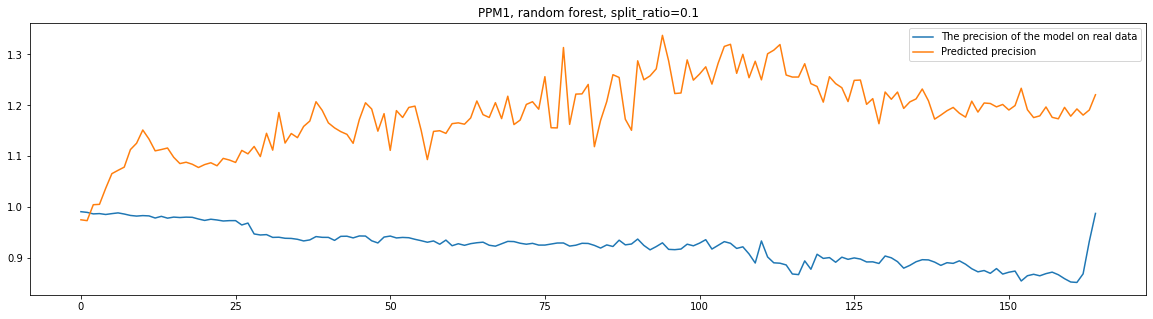

In [98]:
df2.plot(title='PPM1, random forest, split_ratio=0.1', figsize=(20,5))

performance predict model2

In [99]:
model_c = tf.keras.Sequential([
    tf.keras.layers.Dense(81, activation='relu'),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(81*2, activation='relu'),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(10, activation='relu'),
    #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(3)
  ])
opt = optimizers.Adam(learning_rate=0.00001)
model_c.compile(optimizer=opt,
              loss='mse',
              metrics=[r2])

#es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8)

In [100]:
model_c.fit(drift_data_ks_stats_diff, metric_b, validation_split=0.2, batch_size=50, epochs=800)

Epoch 1/800
49/49 [==============================] - 1s 7ms/step - loss: 4.5919e-05 - r2: -3.6067 - val_loss: 2.4949e-05 - val_r2: -1.4480
Epoch 2/800
49/49 [==============================] - 0s 4ms/step - loss: 2.9197e-05 - r2: -1.8567 - val_loss: 2.1149e-05 - val_r2: -1.0765
Epoch 3/800
49/49 [==============================] - 0s 4ms/step - loss: 2.4847e-05 - r2: -1.4592 - val_loss: 1.8287e-05 - val_r2: -0.7938
Epoch 4/800
49/49 [==============================] - 0s 4ms/step - loss: 2.1092e-05 - r2: -1.1454 - val_loss: 1.5677e-05 - val_r2: -0.5289
Epoch 5/800
49/49 [==============================] - 0s 4ms/step - loss: 1.8565e-05 - r2: -0.8163 - val_loss: 1.3686e-05 - val_r2: -0.3296
Epoch 6/800
49/49 [==============================] - 0s 4ms/step - loss: 1.6103e-05 - r2: -0.5697 - val_loss: 1.2401e-05 - val_r2: -0.2042
Epoch 7/800
49/49 [==============================] - 0s 4ms/step - loss: 1.4823e-05 - r2: -0.4692 - val_loss: 1.1702e-05 - val_r2: -0.1356
Epoch 8/800
49/49 [========

In [101]:

def predict_precision_for_PPM2():

    batch_size = length
    # 2010년의 data를 기준으로 그 이후의 data 들...
    X2 = np.concatenate((X[2011],X[2012],X[2013],X[2014],X[2015],X[2016],X[2017],X[2018]))
    Y2 = np.concatenate((Y[2011],Y[2012],Y[2013],Y[2014],Y[2015],Y[2016],Y[2017],Y[2018]))

    batch = math.ceil(X2.shape[0]/batch_size)
    df = {}
    df['The precision of the model on real data'] = []
    df['Predicted precision'] = []

    predict = ML[2010].predict
    for i in range(batch):
        X3 = X2[i*batch_size:(i+1)*batch_size]
        Y3 = Y2[i*batch_size:(i+1)*batch_size]
        f1 = precision_recall_fscore_support(Y3, predict(scaler.transform(X3)),average='binary')
        X3_drift = base_drift[:,0] - ks_drift(x_ref,X3)[:,0]
        acc_c = model_c.predict(X3_drift.reshape(1,-1))[0]
        print(f"{f1[0]}, {base_score[0] - acc_c[0]}")
        df['The precision of the model on real data'].append(f1[0])
        df['Predicted precision'].append(base_score[0] - acc_c[0])

    df2 = pd.DataFrame(df)

    return df2

In [102]:
df2 = predict_precision_for_PPM2()

0.9912419239052405, 0.983233609218979
0.9898946152735671, 0.983233609218979
0.9869233029679695, 0.983233609218979
0.9874945470408608, 0.983233609218979
0.9857672349888806, 0.9822868932791889
0.9874464628562989, 0.9808301059351207
0.9888970051132213, 0.9819475640364826
0.9866647340194231, 0.9815305564374567
0.9838686446780931, 0.9809094508931876
0.9826263211234979, 0.9793905475930215
0.9835521569759054, 0.9797686729402185
0.982987848463188, 0.9787654178039075
0.9788283062645011, 0.9793593687758685
0.9821119446047317, 0.9803980327964664
0.9785546415981199, 0.9772560139940024
0.9806330394565689, 0.9795007491306306
0.9797907410061631, 0.9813049901098848
0.9805430521271962, 0.9801598177113474
0.980192335294962, 0.9793295226813198
0.976858547873879, 0.9812321485773564
0.9741156169111302, 0.9802130749271155
0.9764453961456103, 0.9801085134790183
0.9749748310081979, 0.9810089794740916
0.9729806598407281, 0.981202302948469
0.9736766809728183, 0.9817848224014879
0.9736954967834167, 0.98139384200

In [103]:
MAE = mean_absolute_error(df2['The precision of the model on real data'], df2['Predicted precision'])
MSE = mean_squared_error(df2['The precision of the model on real data'], df2['Predicted precision']) 
RMSE = np.sqrt(MSE)
r_2 = r2_score(df2['The precision of the model on real data'], df2['Predicted precision']) 
print('MAE',MAE)
print('RMSE',RMSE)
print('R2',r_2)
#display adjusted R-squared
adj_r2 = 1 - (1-r_2)*(df2.shape[0]-1)/(df2.shape[0]-80)
print('adj R2',adj_r2)

MAE 0.05065751499237004
RMSE 0.059721171513336384
R2 -1.9149160370374547
adj R2 -4.624073294989913


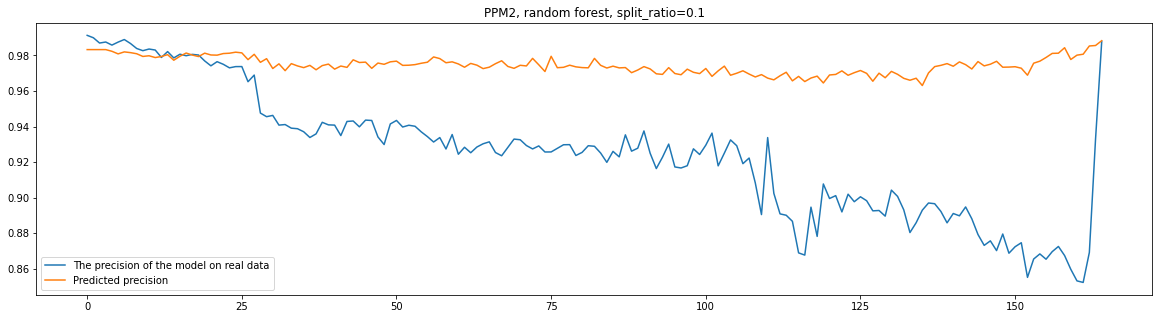

In [104]:
df2.plot(title='PPM2, random forest, split_ratio=0.1', figsize=(20,5))

## PPM1, random_forest, split_ratio=0.3

In [105]:
metric_a,metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals,drift_data_ks_stats_diff,drift_data_ks_pvals_diff,length = drift_sampling(ML[2010].predict,trainsize=0.30, epoch = 6000)

6000/6000 acc:0.9836 1.0000 0.9917 sum:0.5730 76.7378 shape:(8047, 81)

In [106]:
drift_data_ks_stats.shape

(2733, 81)

In [115]:
model_c = tf.keras.Sequential([
    tf.keras.layers.Dense(81, activation='relu'),
    #tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(81*2, activation='relu'),
    tf.keras.layers.Dropout(0.05),
    #tf.keras.layers.Dense(10, activation='relu'),
    #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1)
  ])
opt = optimizers.Adam(learning_rate=0.00001)
model_c.compile(optimizer=opt,
              loss='mse',
              metrics=[r2])
model_c.fit(drift_data_ks_stats, metric_c[:,0], validation_split=0.2, batch_size=50, epochs=800)

Epoch 1/800
44/44 [==============================] - 1s 7ms/step - loss: 0.9751 - r2: -287091.8125 - val_loss: 0.9671 - val_r2: -292173.6250
Epoch 2/800
44/44 [==============================] - 0s 4ms/step - loss: 0.9593 - r2: -285295.2812 - val_loss: 0.9513 - val_r2: -287385.7188
Epoch 3/800
44/44 [==============================] - 0s 4ms/step - loss: 0.9434 - r2: -278761.1250 - val_loss: 0.9355 - val_r2: -282616.4375
Epoch 4/800
44/44 [==============================] - 0s 4ms/step - loss: 0.9276 - r2: -270667.3125 - val_loss: 0.9196 - val_r2: -277821.2812
Epoch 5/800
44/44 [==============================] - 0s 5ms/step - loss: 0.9115 - r2: -265502.0000 - val_loss: 0.9033 - val_r2: -272926.9688
Epoch 6/800
44/44 [==============================] - 0s 4ms/step - loss: 0.8951 - r2: -263554.2188 - val_loss: 0.8865 - val_r2: -267832.0938
Epoch 7/800
44/44 [==============================] - 0s 4ms/step - loss: 0.8777 - r2: -258247.5000 - val_loss: 0.8688 - val_r2: -262490.0312
Epoch 8/800
4

In [118]:
model_c.fit(drift_data_ks_stats, metric_c[:,0], validation_split=0.2, batch_size=50, epochs=200)

Epoch 1/200
44/44 [==============================] - 0s 4ms/step - loss: 5.5281e-04 - r2: -165.4265 - val_loss: 6.4172e-06 - val_r2: -0.9360
Epoch 2/200
44/44 [==============================] - 0s 3ms/step - loss: 5.6167e-04 - r2: -164.9072 - val_loss: 4.7952e-06 - val_r2: -0.3562
Epoch 3/200
44/44 [==============================] - 0s 3ms/step - loss: 5.9216e-04 - r2: -179.8855 - val_loss: 7.9740e-06 - val_r2: -1.4242
Epoch 4/200
44/44 [==============================] - 0s 4ms/step - loss: 5.9633e-04 - r2: -176.6664 - val_loss: 5.2682e-06 - val_r2: -0.4837
Epoch 5/200
44/44 [==============================] - 0s 4ms/step - loss: 5.9631e-04 - r2: -169.4484 - val_loss: 8.0898e-06 - val_r2: -1.4625
Epoch 6/200
44/44 [==============================] - 0s 4ms/step - loss: 5.6978e-04 - r2: -166.1558 - val_loss: 4.5297e-06 - val_r2: -0.3124
Epoch 7/200
44/44 [==============================] - 0s 4ms/step - loss: 5.9504e-04 - r2: -184.5788 - val_loss: 5.2447e-06 - val_r2: -0.5573
Epoch 8/200
4

In [119]:
df2 = predict_precision_for_PPM1()

0.9912419239052405,0.9690829515457153
0.9898946152735671,0.9676857590675354
0.9869233029679695,0.9449357390403748
0.9874945470408608,0.9412603974342346
0.9857672349888806,0.9496433138847351
0.9874464628562989,0.940693199634552
0.9888970051132213,0.9572773575782776
0.9866647340194231,0.9586426615715027
0.9838686446780931,0.9397377371788025
0.9826263211234979,0.9454396963119507
0.9835521569759054,0.9165445566177368
0.982987848463188,0.9392970204353333
0.9788283062645011,0.9507088661193848
0.9821119446047317,0.9441445469856262
0.9785546415981199,0.9598217010498047
0.9806330394565689,0.9434710741043091
0.9797907410061631,0.9319105744361877
0.9805430521271962,0.9314412474632263
0.980192335294962,0.9315291047096252
0.976858547873879,0.9431535601615906
0.9741156169111302,0.9532701969146729
0.9764453961456103,0.933448314666748
0.9749748310081979,0.9138604998588562
0.9729806598407281,0.930688202381134
0.9736766809728183,0.9217267632484436
0.9736954967834167,0.9168428182601929
0.9651804670912951

In [120]:
MAE = mean_absolute_error(df2['The precision of the model on real data'], df2['Predicted precision'])
MSE = mean_squared_error(df2['The precision of the model on real data'], df2['Predicted precision']) 
RMSE = np.sqrt(MSE)
r_2 = r2_score(df2['The precision of the model on real data'], df2['Predicted precision']) 
print('MAE',MAE)
print('RMSE',RMSE)
print('R2',r_2)
#display adjusted R-squared
adj_r2 = 1 - (1-r_2)*(df2.shape[0]-1)/(df2.shape[0]-80)
print('adj R2',adj_r2)

MAE 0.10589602562008014
RMSE 0.12123251208665259
R2 -11.011786974098884
adj R2 -22.17568310296726


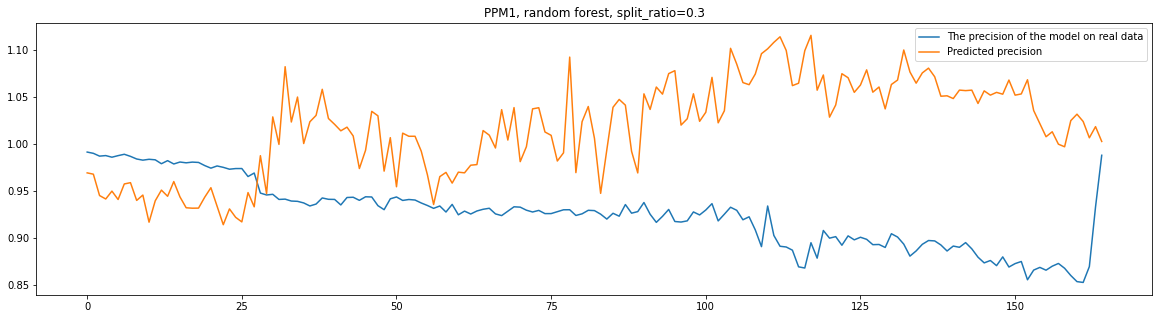

In [121]:
df2.plot(title='PPM1, random forest, split_ratio=0.3', figsize=(20,5))

PPM2

In [122]:
model_c = tf.keras.Sequential([
    tf.keras.layers.Dense(81, activation='relu'),
    #tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(81*2, activation='relu'),
    tf.keras.layers.Dropout(0.01),
    #tf.keras.layers.Dense(10, activation='relu'),
    #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(3)
  ])
opt = optimizers.Adam(learning_rate=0.00001)
model_c.compile(optimizer=opt,
              loss='mse',
              metrics=[r2])

In [123]:
model_c.fit(drift_data_ks_stats_diff, metric_b, validation_split=0.2, batch_size=50, epochs=800)

Epoch 1/800
44/44 [==============================] - 1s 6ms/step - loss: 1.4307e-05 - r2: -4.3819 - val_loss: 8.3579e-06 - val_r2: -2.2314
Epoch 2/800
44/44 [==============================] - 0s 4ms/step - loss: 7.3017e-06 - r2: -1.8158 - val_loss: 6.4792e-06 - val_r2: -1.5254
Epoch 3/800
44/44 [==============================] - 0s 4ms/step - loss: 6.4002e-06 - r2: -1.4769 - val_loss: 5.9376e-06 - val_r2: -1.3155
Epoch 4/800
44/44 [==============================] - 0s 4ms/step - loss: 5.8638e-06 - r2: -1.2516 - val_loss: 5.4863e-06 - val_r2: -1.1377
Epoch 5/800
44/44 [==============================] - 0s 4ms/step - loss: 5.4263e-06 - r2: -1.0841 - val_loss: 5.0842e-06 - val_r2: -0.9804
Epoch 6/800
44/44 [==============================] - 0s 3ms/step - loss: 5.0314e-06 - r2: -0.9380 - val_loss: 4.7402e-06 - val_r2: -0.8484
Epoch 7/800
44/44 [==============================] - 0s 3ms/step - loss: 4.6940e-06 - r2: -0.7978 - val_loss: 4.4469e-06 - val_r2: -0.7345
Epoch 8/800
44/44 [========

In [124]:
df2 = predict_precision_for_PPM2()

0.9912419239052405, 0.9815213926889838
0.9898946152735671, 0.9871516648385578
0.9869233029679695, 0.9979822747231365
0.9874945470408608, 0.9933567703523577
0.9857672349888806, 0.9929788000703693
0.9874464628562989, 0.994604406394893
0.9888970051132213, 0.9930015401736737
0.9866647340194231, 0.9903846853234709
0.9838686446780931, 0.9906024266787709
0.9826263211234979, 0.9954406958826721
0.9835521569759054, 0.9965227395118118
0.982987848463188, 0.993606968299383
0.9788283062645011, 0.9908840888933182
0.9821119446047317, 0.9913801415645421
0.9785546415981199, 0.9953643851735533
0.9806330394565689, 0.9981622211457134
0.9797907410061631, 0.9985143514172078
0.9805430521271962, 0.9931220342227162
0.980192335294962, 0.9973508398801924
0.976858547873879, 0.9950163834550322
0.9741156169111302, 0.9921387410544694
0.9764453961456103, 0.9939003782168866
0.9749748310081979, 0.9967340389088631
0.9729806598407281, 0.9940931815476061
0.9736766809728183, 0.9917016555377186
0.9736954967834167, 0.99514235

In [125]:
MAE = mean_absolute_error(df2['The precision of the model on real data'], df2['Predicted precision'])
MSE = mean_squared_error(df2['The precision of the model on real data'], df2['Predicted precision']) 
RMSE = np.sqrt(MSE)
r_2 = r2_score(df2['The precision of the model on real data'], df2['Predicted precision']) 
print('MAE',MAE)
print('RMSE',RMSE)
print('R2',r_2)
#display adjusted R-squared
adj_r2 = 1 - (1-r_2)*(df2.shape[0]-1)/(df2.shape[0]-80)
print('adj R2',adj_r2)

MAE 0.08005357588169898
RMSE 0.09093418669462396
R2 -5.758087126731209
adj R2 -12.039132809222568


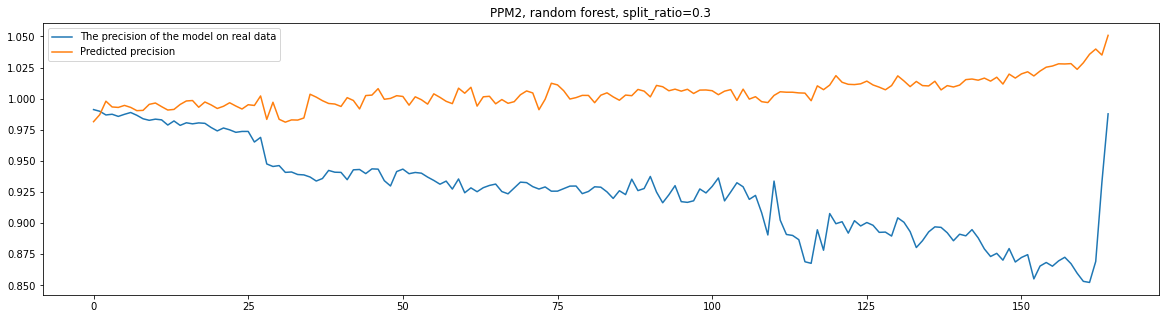

In [127]:
df2.plot(title='PPM2, random forest, split_ratio=0.3', figsize=(20,5))

## PPM1, random_forest, split_ratio=0.5

In [128]:
metric_a,metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals,drift_data_ks_stats_diff,drift_data_ks_pvals_diff,length = drift_sampling(ML[2010].predict,trainsize=0.50, epoch = 6000)

6000/6000 acc:0.9855 1.0000 0.9927 sum:0.5067 74.6805 shape:(8047, 81)

In [129]:
drift_data_ks_stats.shape

(2926, 81)

In [130]:
model_c = tf.keras.Sequential([
    tf.keras.layers.Dense(81, activation='relu'),
    #tf.keras.layers.LayerNormalization(),
    tf.keras.layers.Dense(81*2, activation='relu'),
    #tf.keras.layers.LayerNormalization(),
    #tf.keras.layers.Dense(10, activation='relu'),
    #tf.keras.layers.LayerNormalization(),
    tf.keras.layers.Dense(3)
  ])
opt = optimizers.Adam(learning_rate=0.00001)
model_c.compile(optimizer=opt,
              loss='mse',
              metrics=[r2])
model_c.fit(drift_data_ks_stats, metric_c, validation_split=0.2, batch_size=50, epochs=800)

Epoch 1/800
47/47 [==============================] - 1s 5ms/step - loss: 0.9851 - r2: -30495.1328 - val_loss: 0.9811 - val_r2: -30376.5098
Epoch 2/800
47/47 [==============================] - 0s 3ms/step - loss: 0.9773 - r2: -30257.1758 - val_loss: 0.9731 - val_r2: -30128.2559
Epoch 3/800
47/47 [==============================] - 0s 3ms/step - loss: 0.9690 - r2: -29973.3027 - val_loss: 0.9644 - val_r2: -29857.7891
Epoch 4/800
47/47 [==============================] - 0s 3ms/step - loss: 0.9598 - r2: -29698.7559 - val_loss: 0.9548 - val_r2: -29559.4688
Epoch 5/800
47/47 [==============================] - 0s 3ms/step - loss: 0.9497 - r2: -29391.6973 - val_loss: 0.9441 - val_r2: -29230.4121
Epoch 6/800
47/47 [==============================] - 0s 3ms/step - loss: 0.9386 - r2: -29048.5605 - val_loss: 0.9326 - val_r2: -28873.1270
Epoch 7/800
47/47 [==============================] - 0s 3ms/step - loss: 0.9267 - r2: -28683.9551 - val_loss: 0.9204 - val_r2: -28496.7500
Epoch 8/800
47/47 [========

In [131]:
df2 = predict_precision_for_PPM1()

0.9912419239052405,0.9826328754425049
0.9898946152735671,1.0007566213607788
0.9869233029679695,0.9899877309799194
0.9874945470408608,0.9821075797080994
0.9857672349888806,0.9884424209594727
0.9874464628562989,0.9967166185379028
0.9888970051132213,1.0035954713821411
0.9866647340194231,1.0769665241241455
0.9838686446780931,1.136326551437378
0.9826263211234979,1.1542328596115112
0.9835521569759054,1.1570631265640259
0.982987848463188,1.1560336351394653
0.9788283062645011,1.1565732955932617
0.9821119446047317,1.1355692148208618
0.9785546415981199,1.1398032903671265
0.9806330394565689,1.1266134977340698
0.9797907410061631,1.126855731010437
0.9805430521271962,1.1303164958953857
0.980192335294962,1.1393965482711792
0.976858547873879,1.114820957183838
0.9741156169111302,1.1236716508865356
0.9764453961456103,1.1251027584075928
0.9749748310081979,1.1426854133605957
0.9729806598407281,1.1541717052459717
0.9736766809728183,1.1395573616027832
0.9736954967834167,1.1367274522781372
0.9651804670912951

In [132]:
MAE = mean_absolute_error(df2['The precision of the model on real data'], df2['Predicted precision'])
MSE = mean_squared_error(df2['The precision of the model on real data'], df2['Predicted precision']) 
RMSE = np.sqrt(MSE)
r_2 = r2_score(df2['The precision of the model on real data'], df2['Predicted precision']) 
print('MAE',MAE)
print('RMSE',RMSE)
print('R2',r_2)
#display adjusted R-squared
adj_r2 = 1 - (1-r_2)*(df2.shape[0]-1)/(df2.shape[0]-80)
print('adj R2',adj_r2)

MAE 0.4039722469522148
RMSE 0.43426377080001416
R2 -153.12624969084726
adj R2 -296.37299940351704


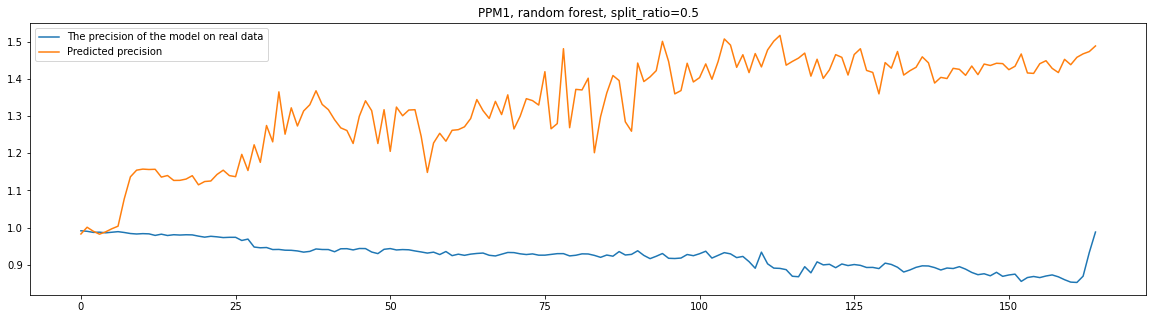

In [133]:
df2.plot(title='PPM1, random forest, split_ratio=0.5', figsize=(20,5))

PPM2

In [134]:
model_c = tf.keras.Sequential([
    tf.keras.layers.Dense(81, activation='relu'),
    #tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(81*2, activation='relu'),
    tf.keras.layers.Dropout(0.01),
    #tf.keras.layers.Dense(10, activation='relu'),
    #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(3)
  ])
opt = optimizers.Adam(learning_rate=0.00001)
model_c.compile(optimizer=opt,
              loss='mse',
              metrics=[r2])
model_c.fit(drift_data_ks_stats_diff, metric_b, validation_split=0.2, batch_size=50, epochs=800)

Epoch 1/800
47/47 [==============================] - 1s 6ms/step - loss: 4.1129e-06 - r2: -3.1556 - val_loss: 2.7685e-06 - val_r2: -2.0108
Epoch 2/800
47/47 [==============================] - 0s 4ms/step - loss: 2.5997e-06 - r2: -1.6112 - val_loss: 2.4035e-06 - val_r2: -1.6107
Epoch 3/800
47/47 [==============================] - 0s 4ms/step - loss: 2.2639e-06 - r2: -1.2386 - val_loss: 2.1002e-06 - val_r2: -1.2798
Epoch 4/800
47/47 [==============================] - 0s 4ms/step - loss: 2.0094e-06 - r2: -1.0019 - val_loss: 1.8614e-06 - val_r2: -1.0227
Epoch 5/800
47/47 [==============================] - 0s 4ms/step - loss: 1.7751e-06 - r2: -0.7701 - val_loss: 1.6738e-06 - val_r2: -0.8149
Epoch 6/800
47/47 [==============================] - 0s 4ms/step - loss: 1.6157e-06 - r2: -0.5875 - val_loss: 1.5295e-06 - val_r2: -0.6561
Epoch 7/800
47/47 [==============================] - 0s 4ms/step - loss: 1.5035e-06 - r2: -0.5011 - val_loss: 1.4154e-06 - val_r2: -0.5306
Epoch 8/800
47/47 [========

In [135]:
df2 = predict_precision_for_PPM2()

0.9912419239052405, 0.9862243956708253
0.9898946152735671, 0.9892999601838083
0.9869233029679695, 0.9784018369213582
0.9874945470408608, 0.9768245573908926
0.9857672349888806, 0.9756233319462181
0.9874464628562989, 0.9712254013688207
0.9888970051132213, 0.9731403617010356
0.9866647340194231, 0.9815312353716136
0.9838686446780931, 0.9828764023081303
0.9826263211234979, 0.9762755622909308
0.9835521569759054, 0.9790750983924509
0.982987848463188, 0.9777898052529336
0.9788283062645011, 0.9855041995000929
0.9821119446047317, 0.9792412975625039
0.9785546415981199, 0.9794304165811182
0.9806330394565689, 0.973851657454753
0.9797907410061631, 0.9755687964902163
0.9805430521271962, 0.9817910017267705
0.980192335294962, 0.9764394154594184
0.976858547873879, 0.981208140944028
0.9741156169111302, 0.9823575140730382
0.9764453961456103, 0.975240263138795
0.9749748310081979, 0.9708857778281809
0.9729806598407281, 0.9699521083206774
0.9736766809728183, 0.9700661096543909
0.9736954967834167, 0.966413401

In [136]:
MAE = mean_absolute_error(df2['The precision of the model on real data'], df2['Predicted precision'])
MSE = mean_squared_error(df2['The precision of the model on real data'], df2['Predicted precision']) 
RMSE = np.sqrt(MSE)
r_2 = r2_score(df2['The precision of the model on real data'], df2['Predicted precision']) 
print('MAE',MAE)
print('RMSE',RMSE)
print('R2',r_2)
#display adjusted R-squared
adj_r2 = 1 - (1-r_2)*(df2.shape[0]-1)/(df2.shape[0]-80)
print('adj R2',adj_r2)

MAE 0.08553736991494458
RMSE 0.10118405340659933
R2 -7.367458345341701
adj R2 -15.144272572188694


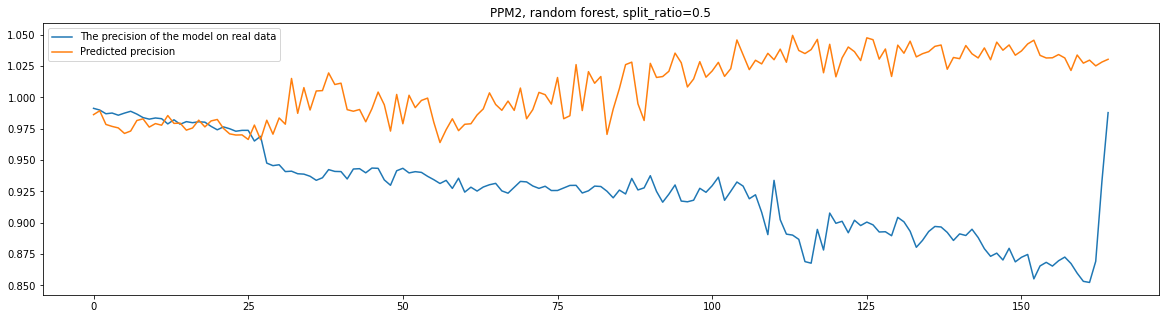

In [137]:
df2.plot(title='PPM2, random forest, split_ratio=0.5', figsize=(20,5))